<h3> Midterm 2 </h3>
<p> Exam Start - Sunday 18 9 AM, Exam End - Wednesday 21 12 PM </p>

<p> Please read the following before attempting the exam </p>
* You can use this notebook as a template for your exam.
* You can use any source to answer the questions, please read through the below cells for a brief description of the dataset 
  and points split.
* You can use any library, for example, sklearn, pandas, Scipy etc.
* Do not plagiarize

<h2>Note: Please make sure your variable names for dataframes are not the same to avoid assignment errors.

Please make sure your notebook runs completely on Restart and Run without errors. </h2>


<p>Dataset</p>
* The data set is included in the assignment, it can also be downloaded from https://www.kaggle.com/rudymizrahi/airbnb-listings-in-major-us-cities-deloitte-ml
* You are required to split the data into train, validation and test sets. You can use a split that is reasonable for example 70-10-20.



<p> Question Overview </p>
* The question has two parts:
    * Regression problem: Predict the price of the listing, please note that the price is expressed in the log domain, for the visualizations to be easily understood you need to convert them to integer domain.
    * The final predictions can be in the log domain.
    * Make sure that your validation metric is reasonable i.e. For example if you are using RMSE then make sure outliers in the data (if any) are processed. This question weighs in for 60% of the test.
    * Classification problem: Predict the property_type variable. For this problem treat property_type as your y and predict it. Please make sure you treat it as your y i.e. do not include it in your training data features. This question weighs in for 40 % of the test.

<p> Mention any notes here, for example if you are using a different library like TF of Keras in your notebook. This is a place to mention any other comments you have</p>

<p> Template for part 1 Regression problem </p>


In [1]:
# all imports go here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_fscore_support

C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<p> Question R - 1 (5 Points)</p>
Import data here and make changes, i.e. impute values, remove outliers if any. 
If there are not any missing, outlier, null values points will be awarded for checking them


In [2]:
data_airbnb = pd.read_csv('train.csv')
data_airbnb_test = pd.read_csv('test.csv')
data_airbnb.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...    latitude   longitude  \
0  Real Bed              strict          True  ...   40.696524  -73.991617   
1  Real Bed              strict          True  ...   40.766115  -73.989040   
2  Real Bed            moderate          True  ...   40.808110  -73.943756   
3  Real Bed            flexible          True  ...   37.772004 -122.431619   
4  Real Bed            moderate          True  ...   38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url  zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0  
4                                                NaN    20009      0.0   1.0  

[5 rows x 29 columns]

In [3]:
data_airbnb.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

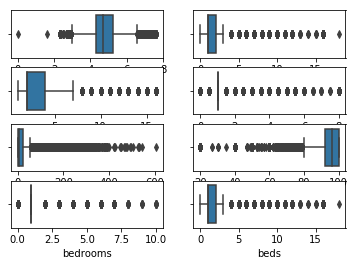

In [4]:
#looking for outliers
plt.figure(1)
plt.subplot(421)
sns.boxplot(x=data_airbnb['log_price'])

plt.subplot(422)
sns.boxplot(x=data_airbnb['beds'])

plt.subplot(423)
sns.boxplot(x=data_airbnb['accommodates'])

plt.subplot(424)
sns.boxplot(x=data_airbnb['bathrooms'])

plt.subplot(425)
sns.boxplot(x=data_airbnb['number_of_reviews'])

plt.subplot(426)
sns.boxplot(x=data_airbnb['review_scores_rating'])

plt.subplot(427)
sns.boxplot(x=data_airbnb['bedrooms'])

plt.subplot(428)
sns.boxplot(x=data_airbnb['beds'])

In [4]:
data_airbnb = data_airbnb.fillna(0)
data_airbnb[['host_identity_verified','host_has_profile_pic']] = data_airbnb[['host_identity_verified','host_has_profile_pic']].replace(0,'f')


In [5]:
data_airbnb = data_airbnb.drop(['id','zipcode','thumbnail_url','name','description','amenities','host_since','last_review','first_review','neighbourhood'],axis=1)
dummy_data_airbnb = pd.get_dummies(data_airbnb[[
                                                
                                                'review_scores_rating',
                                                'number_of_reviews',
                                                'instant_bookable',
                                                'host_identity_verified',
                                                'host_has_profile_pic',
                                                'city',
                                                'cancellation_policy',
                                                'bed_type',
                                                'room_type',
                                                'property_type',
                                                'cleaning_fee',
                                                'host_response_rate'
                                               
                                               ]])

dummy_data_airbnb =  pd.concat([data_airbnb, dummy_data_airbnb], axis=1)
dummy_data_airbnb = dummy_data_airbnb.drop([    'review_scores_rating',
                                                'number_of_reviews',
                                                'instant_bookable',
                                                'host_since',
                                                'host_identity_verified',
                                                'host_has_profile_pic',
                                                'city',
                                                'cancellation_policy',
                                                'bed_type',
                                                'amenities',
                                                'room_type',
                                                'property_type',
                                                'cleaning_fee',
                                                'host_since',
                                                'last_review',
                                                'first_review',
                                                'longitude',
                                                'latitude',
                                                'host_response_rate',
                                                

                                            ],axis = 1)



<p> Question R - 2 (5 . 3 = 15 points) </p>
Plot three task-relevant plots. For example, a line chart showing the trend of prices over time. 
You can use any library or plot type to a plot, but make sure it's readable i.e. proper labeling of the axis, title, and coloring.


C:\Users\kangh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


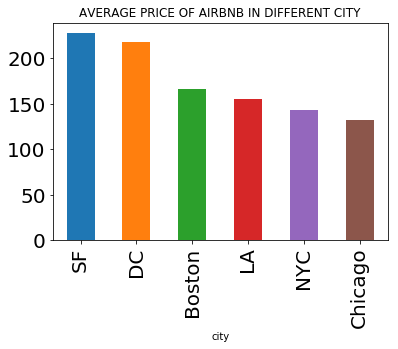

In [7]:
#AVERAGE PRICE OF AIRBNB IN DIFFERENT CITY
airbnb = pd.read_csv('train.csv')
airbnb_ = airbnb[['city','log_price']]
airbnb_['log_price'] = np.exp(airbnb_['log_price'])
airbnb_ = airbnb_.groupby('city')['log_price'].mean()
airbnb_ = airbnb_.sort_values(ascending = False)
ave_price_city = airbnb_.plot.bar(title = 'AVERAGE PRICE OF AIRBNB IN DIFFERENT CITY', fontsize=20)



C:\Users\kangh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


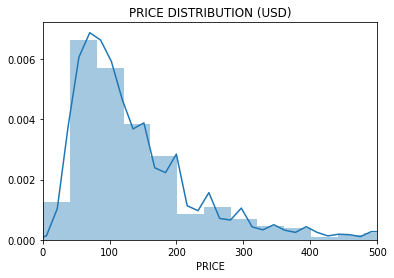

In [8]:
x = plt.figure()
data_airbnb_price_distribution = np.exp(data_airbnb['log_price'])
dist_graph = sns.distplot(data_airbnb_price_distribution).set_title("PRICE DISTRIBUTION (USD)")
plt.xlim(0,500)
plt.xlabel('PRICE')
plt.rc('ytick', labelsize=18)

Text(0.5,1,'DISTRIBUTION OF RATING SCORES')

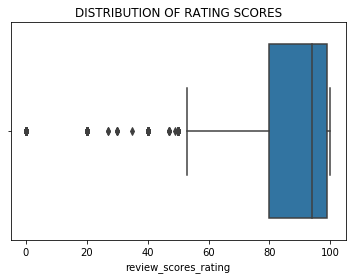

In [9]:
sns.boxplot(x=data_airbnb['review_scores_rating']).set_title('DISTRIBUTION OF RATING SCORES')

<p>Question R - 3 (5.2 =  10 points)</p>
Perform feature selection  - Attempt at least 2 feature selection approaches to select your features. 
You can select one approach for further modeling and explain why you selected it.
1. Stepwise
2. Backward elimination
3. PCA


In [10]:
#PCA
dummy_pca = dummy_data_airbnb.drop(['log_price'],axis=1)
pca = PCA(n_components=30)
#principalComponents = pca.fit_transform(dummy_data_airbnb)
principalComponents = pca.fit_transform(dummy_pca)
principalDf = pd.DataFrame(data = principalComponents, columns = [
                                                                 'a','b','c','d','e','f','g','h','i','j','k','l','m','o','n','p',
    'q','r','s','t','u','v','w','x','y','z','ab','ac','ad','ae'
                                                                 
                                                                 ]
                          )
#finalDf = pd.concat([principalDf, dummy_data_airbnb[['log_price']]], axis = 1)
finalDf = pd.concat([principalDf, dummy_data_airbnb[['log_price']]], axis = 1)
X_PCA = finalDf.loc[:, finalDf.columns != 'log_price']
y_PCA = finalDf.loc[:, finalDf.columns == 'log_price']

In [11]:
#RFE
rfe_data_X = dummy_data_airbnb.drop(['log_price'],axis=1)
rfe_data_y = dummy_data_airbnb.loc[:,dummy_data_airbnb.columns == 'log_price']
Linear_Reg = linear_model.LinearRegression()
rfe = RFE(Linear_Reg, n_features_to_select=5)
rfe_transform=rfe.fit_transform(rfe_data_X,rfe_data_y)
X_train_r,X_test_r,y_train_r,y_test_r=train_test_split(rfe_transform, rfe_data_y,
                test_size=0.25,random_state=0)
rfe.ranking_

C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([140, 139, 138, 141,   1,   1,   1,   1,  14,  15,  19,  16,  20,
        17,  18,  21,  10,   9,  11,  12,  13,   3,   1,   2,   4,   5,
         8,   7,   6,  46,  37,  35,  32,  47,  51,  52,  39,  24,  43,
        42,  36,  53,  31,  48,  49,  54,  41,  56,  55,  23,  30,  34,
        38,  22,  33,  50,  26,  27,  40,  25,  45,  28,  29,  44,  77,
        68, 128, 101,  63, 135, 131,  73, 107,  99, 123,  95, 136,  89,
        59,  58, 117, 108, 134,  75, 124, 126,  74, 130,  86,  71, 127,
       129, 111,  76,  57,  80,  66,  69,  62, 121,  64,  96,  67,  82,
       137, 103, 120, 109, 112, 118, 133, 132,  81,  65, 119,  97, 110,
       122,  60,  78,  84,  61, 114,  85, 104,  92,  88, 116,  94, 105,
        70,  90, 115,  93,  83,  98,  79, 100,  87,  72, 106,  91, 102,
       113, 125])

<p> Question R - 4 (5.3 = 15 points) </p>
Modeling - Please attempt to solve the problem with at least three models with 10-fold cross validation.
1. Linear Regression
2. Ridge Regression
3. Your choice - you can use a regression model you learned in class or some other model that you think would be better.
If you are using a library other than sklearn, for example, a neural network using TensorFlow. Please mention it in the first few 
cells so that I can load it into the environment for grading.

In [12]:
#Linear Regression
k_folds = KFold(10)


X_train,X_test,y_train,y_test = train_test_split(X_PCA,y_PCA,test_size = 0.5)

My_Model_2 = linear_model.LinearRegression()
for k,(train,test) in enumerate(k_folds.split(X_PCA,y_PCA)):
    
    My_Model_2.fit(X_train,y_train)
    print (My_Model_2.score(X_PCA.iloc[test],y_PCA.iloc[test]))

0.5488079311655463
0.564172265590098
0.5602752279091632
0.5660767651119207
0.5673166052575418
0.5549253842326587
0.5430635851335275
0.5487416838887024
0.5441177710138676
0.5489890962872394


In [13]:
#Random Forest
rf_lin = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_lin.fit(X_train,y_train)
print(rf_lin.score(X_test,y_test))

C:\Users\kangh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5581518091327856


In [14]:
#Ridge Regression
rd_lin = Ridge()
rd_lin.fit(X_train,y_train)
print(rd_lin.score(X_test,y_test))

0.5491922241947518


<p> Grid Search </p>
The grid search is a technique to find the best parameters for your model. It performs an exhaustive search over the hyperparameter search space to get the best settings. You can find an example here, https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html.
Also, you can find an example here https://github.com/sourabhparime/Teaching/blob/master/Workshop%202/2_GridSearch_HyperparameterEstimation.ipynb 

<p> Question R - 6 (10 points)</p>
Tuning - From the above cell you have your best performing model. Tune it using grid search, to get the best parameters. 
As usual, you get points for grid searching, i.e. even if you find that the default hyperparameters are the best per-
forming you still get points for grid searching

In [15]:
#Grid Search
param_grid = {'alpha':[0.1,1,10,100] }
grid = GridSearchCV(Ridge(), param_grid ,cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'alpha': 10}


<p> Question R - 7 (10 points) </p>
Predict - Split your dataset into train, test and predict the test values using your best performing model and your
best hyperparameters

In [16]:
tuned_ridge = Ridge(alpha=10)
tuned_ridge.fit(X_train,y_train)
ridge_prediction = tuned_ridge.predict(X_test)
ridge_prediction

array([[4.24396438],
       [4.35546837],
       [4.19240765],
       ...,
       [5.29281912],
       [6.11650346],
       [4.77880555]])

<p> Question R - 8 </p>
Write a stepwise summary of your findings.
1. If there were any imputations executed, what were they?  (1 point)
2. You plotted three graphs. What is the insight you gained in one line? (2 points per insight.)   (2 .3  = 6 points)
3. Which feature selection method worked for you?  (1 point)
4. What was the third model you implemented?. Was it better than the required two? If yes, then why? (2 points)


In [17]:
#Question1 
"""I have replaced 0 for null value for the convenience of data preprocessing. 
   Also, I have replace 'f' for the 0 in the column of 'host_identity_verified'and 'host_has_profile_pic' in or to 
   match the other string values in the column and for the convenience of further data preprocessing.
   More over, I have drop multiple columns considered relatively irrelavent or too complex to analyze."""
#Question2
"""First Graph: I have found that SanFranciso has the highest average price of airbnb, 
   while Chicago has the relatively lowest average price
   Second Graph: I have printed the distribution of the price, where I found that the majority of the price concentratee
   in the range of 100 to 200 dollars.
   Third Paragraph: The third graph showed the distribution of the rating score,
   where the most of the scores were located at the range around 75 to 95. """
#Question3
"""I chose PCA for further use"""
#Question4
"""I chose random forest regression. It was slightly better by 1 percent."""

'I chose random forest regression. It was slightly better by 1 percent.'

<p> Template for part 2 Classification problem </p>
*Note: Please make sure your variable names for dataframes are not the same to avoid variable assignment errors.
Please make sure your notebook runs completely on Restart and Run without errors.


<p> Question C - 1 (3.3 = 9 points) </p>
Plot three task-relevant plots. For example, a line chart showing the trend of prices over time. 
You can use any library or plot type to a plot, but make sure it's readable i.e. proper labeling of the axis, title, and coloring.




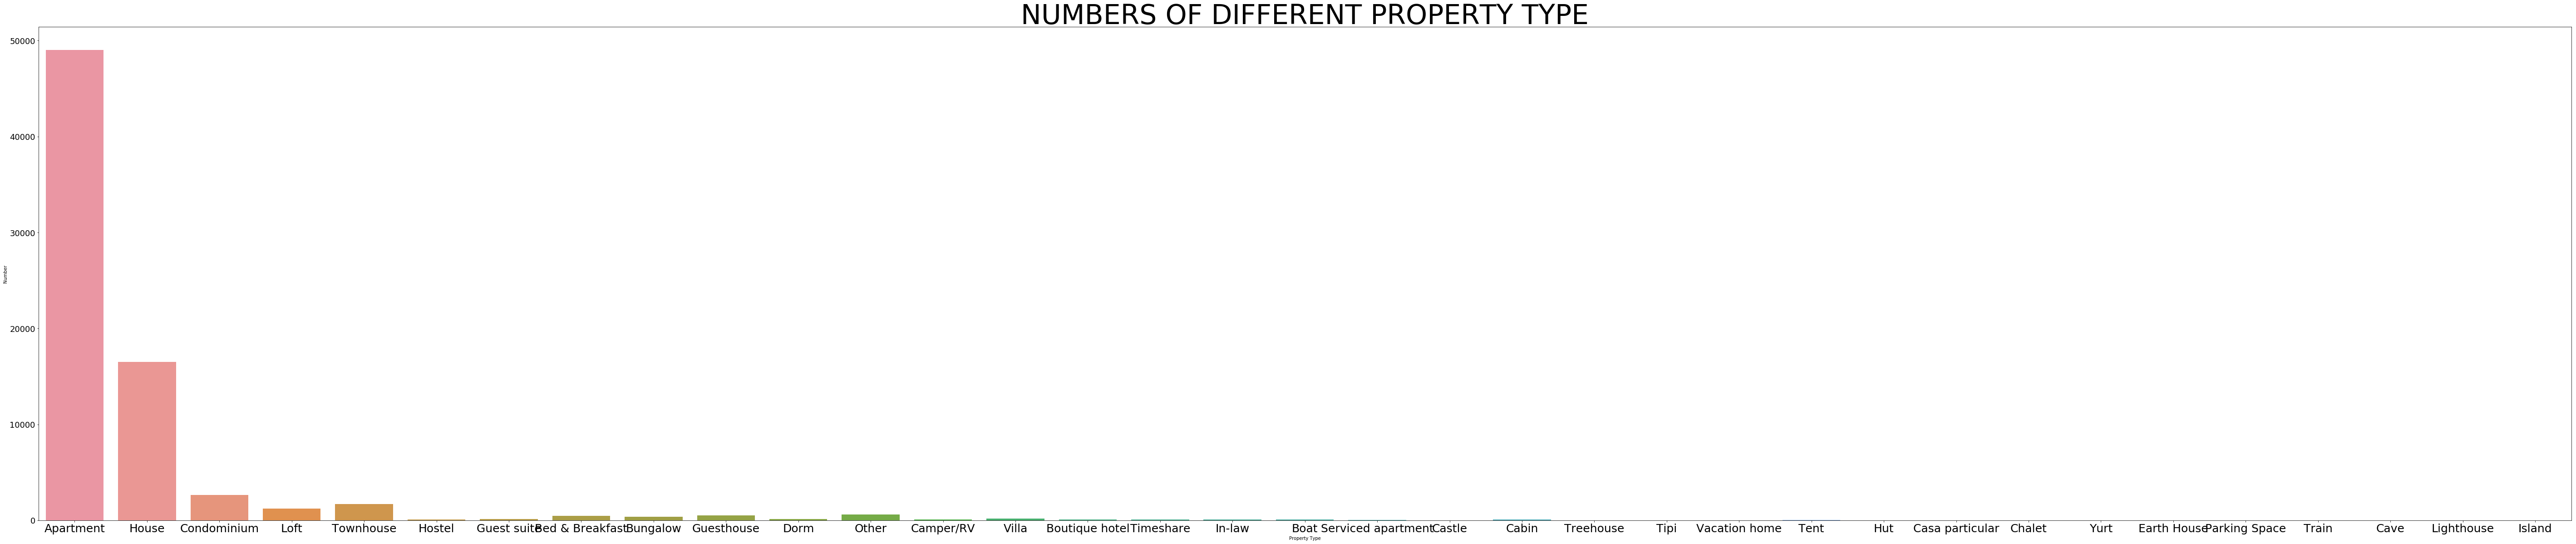

In [18]:
#Numbers of Different Property Type
plt.figure(figsize=(100,20))
plt.rc('xtick', labelsize=25)
sns.countplot(x="property_type",data=data_airbnb).set_title('NUMBERS OF DIFFERENT PROPERTY TYPE', fontsize = 60)
plt.xlabel('Property Type')
plt.ylabel("Number")
plt.rc('ytick', labelsize=70)

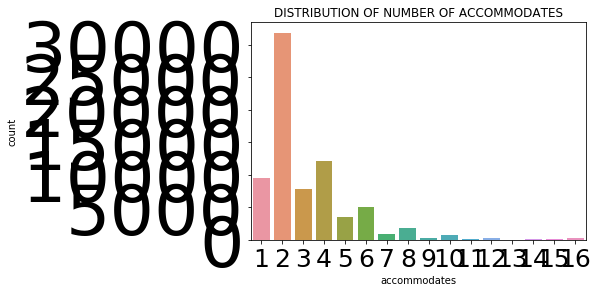

In [19]:
sns.countplot(data_airbnb['accommodates']).set_title('DISTRIBUTION OF NUMBER OF ACCOMMODATES')
plt.rc('xtick',labelsize = 10)
plt.rc('ytick',labelsize = 10)


Text(0.5,1,'DISTRIBUTION OF NUMBER OF BEDROOMS')

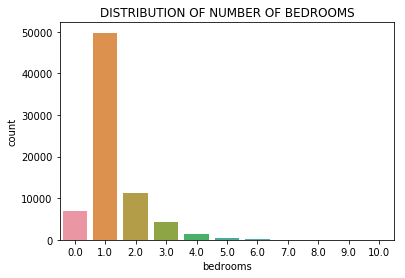

In [20]:
sns.countplot(x = data_airbnb['bedrooms']).set_title('DISTRIBUTION OF NUMBER OF BEDROOMS')

<p> Question C - 2 (5 * 3 = 15 points)</p>
Modeling - Please attempt to solve the problem with at least three models with 10-fold cross validation -5 points
1. Logistic Regression
2. KNN
3. SVM

In [6]:
dummy_data_airbnb_logistic = pd.get_dummies(data_airbnb[[
                                                
                                                'review_scores_rating',
                                                'number_of_reviews',
                                                'instant_bookable',
                                                'host_identity_verified',
                                                'host_has_profile_pic',
                                                'city',
                                                'cancellation_policy',
                                                'bed_type',
                                                'room_type',
                                                'cleaning_fee',
                                                
                                                'host_response_rate'
                                            
                                               ]])

dummy_data_airbnb_logistic =  pd.concat([data_airbnb, dummy_data_airbnb_logistic], axis=1)
dummy_data_airbnb_logistic = dummy_data_airbnb_logistic.drop([
                                                'review_scores_rating',
                                                'number_of_reviews',
                                                'instant_bookable',
                                                'host_since',
                                                'host_identity_verified',
                                                'host_has_profile_pic',
                                                'city',
                                                'cancellation_policy',
                                                'bed_type',
                                                'amenities',
                                                'room_type',
                                               
                                                'cleaning_fee',
                                                'host_since',
                                                'last_review',
                                                'first_review',
                                                'longitude',
                                                'latitude',
                                                'host_response_rate',
                                                'id'

                                            ],axis = 1)

X_logistics = dummy_data_airbnb_logistic.loc[:, dummy_data_airbnb_logistic.columns != 'property_type']
y_logistics = dummy_data_airbnb_logistic.loc[:,dummy_data_airbnb_logistic.columns == 'property_type']

kfold = model_selection.KFold(n_splits=10, random_state=0)

X_train_log,X_test_log,y_train_log,y_test_log = train_test_split(X_logistics,y_logistics,test_size = 0.5)


In [22]:
#LogisticRegression
My_Model_3 = linear_model.LogisticRegression(random_state=0)
My_Model_3.fit(X_train_log,y_train_log)
results = model_selection.cross_val_score(My_Model_3, X_logistics, y_logistics, cv=kfold)
print(results.mean())

C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.7158991338337442


In [23]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train_log,y_train_log)
knn_pred = knn.predict(X_test_log)
results_knn = model_selection.cross_val_score(knn, X_logistics, y_logistics, cv=kfold)
print(results_knn.mean())

C:\Users\kangh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A 

0.7126472164777741


In [ ]:
#SVC
#model_SVC = SVC()
#model_SVC.fit(X_train_log,y_train_log)
#results_SVM = model_selection.cross_val_score(model_SVC,X_logistics,y_logistics,cv=kfold)
#print(results_SVM.mean())

C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<p> Question C - 3 (6 points)</p>
Tuning - From the above cell you have your best performing model. Tune it using grid search, to get the best parameters. 
As usual, you get points for grid searching, i.e. even if you find that the default hyperparameters are the best per-
forming you still get points for grid searching

In [25]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100] }
grid = GridSearchCV(LogisticRegression(), param_grid ,cv=5)
grid.fit(X_train_log, y_train_log)

print(grid.best_params_)
#I chose on parameter since my laptop couldn't run choosing multiple parameters

C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

{'C': 1}


<p> Question C - 3 (5 points) </p>
Predict - Split your dataset into train, test and predict the test values using your best performing model and your
best hyperparameters

In [26]:
My_Model_grid = linear_model.LogisticRegression(C=1,random_state=0)
My_Model_grid.fit(X_train_log,y_train_log)
test_prediction = My_Model_grid.predict(X_test_log)
results = model_selection.cross_val_score(My_Model_grid, X_logistics, y_logistics, cv=kfold)
print(results.mean())

C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.7158991338337442


<p> Question C - 4 (5 points) </p>
Results - Print a confusion matrix, precision and recall

In [27]:
confusion = confusion_matrix(y_test_log,test_prediction)
precision,recall,fscore,support = precision_recall_fscore_support(y_test_log,test_prediction)
print(confusion)
print(precision)
print(recall)

[[22348     0     0 ...     0     0     0]
 [  114     0     0 ...     0     0     0]
 [   30     0     0 ...     0     0     0]
 ...
 [    5     0     0 ...     0     0     0]
 [   30     0     0 ...     0     0     0]
 [    4     0     0 ...     0     0     0]]
[0.75484699 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.45454545 0.         0.         0.         0.         0.55944527
 0.         0.         0.         0.5        0.42857143 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
[0.91175391 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.06666667 0.         0.         0.         0.         0.50193283
 0.         0.         0.         0.0015456  0.01102941 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
